# Data Analyis Project - Baby name popularity

## Author: Phillip Liu

This is a data analysis project inspired by Michele Vallisneri's course on Linkedin

I have used both USA and NZ datas.

US data source: https://www.ssa.gov/oact/babynames/limits.html

NZ data source: https://catalogue.data.govt.nz/dataset/baby-name-popularity-over-time/resource/0b0b326c-d720-480f-8f86-bf2d221c7d3f

In [5]:
import urllib
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp
import seaborn as sns

%matplotlib inline

## US Data

In [3]:
# Reading in and concatenating all the csv files into one DataFrame

allyears = pd.concat(
    pd.read_csv(f'names/yob{year}.txt', names=['name','sex','number'])
    .assign(year=year)
    for year in range(1880,2019))

In [4]:
# Creating a multi-indexed DataFrame of the original

allyears_indexed = allyears.set_index(['sex', 'name', 'year']).sort_index()

In [6]:
# Inspecting the DataFrame where the multi-level index has values M and Phillip respectively

allyears_indexed.loc[('M', 'Phillip')].head()

,number
year,
1880,75
1881,84
1882,103
1883,92
1884,89


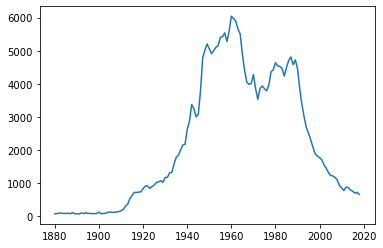

In [42]:
# Plotting the above DataFrame

pp.plot(allyears_indexed.loc['M','Phillip'])

The popualarity of the name "Phillip" increased greatly from 1910 to 1960 and saw consistent popularity until around 1990 where it dropped heavily and still remains low to this day.

It is of interest to note that Prince Philip married Queen Elizabeth in 1947 as we see a big spike in popularity for the name 'Phillip' around that time. However, this is simply a observation based on correlation. Another more likely factor is the end of world war 2 as we saw a surge in birth rates resulting in the "baby boomers".

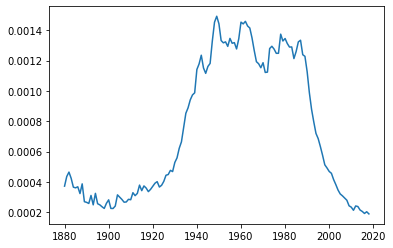

In [8]:
# Plotting the DataFrame as a fraction of all names as a function of year.

pp.plot(allyears_indexed.loc[('M', 'Phillip')] / allyears.groupby('year').sum())

We can see that the popularity of the name Phillip was the highest between the years around 1945 to 1990. However, the name was never very popular even at its peak with the highest value around 0.0014.

The portion of baby boy's named Phillip is consistent with the absolute number of baby boy's names Phillip over the years.

In [10]:
# Placing the above code as a function

def plotpopularityfraction(sex, name): # sex = 'M' or 'F', name first character is capitalized
    pp.plot(allyears_indexed.loc[(sex, name)] / allyears.groupby('year').sum())

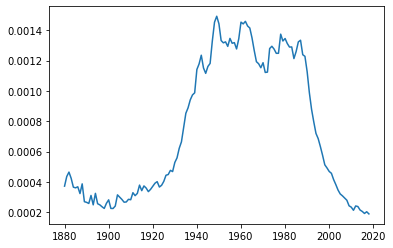

In [11]:
plotpopularityfraction('M', 'Phillip')

In [12]:
# Plot number of sex/name of babies as a function of year

def plotname(sex, name):
    data = allyears_indexed.loc[(sex, name)]
    
    pp.plot(data, label=name)
    pp.axis(xmin=1880, xmax=2018)

In [13]:
# Combine several "plotname()" plots for given sex and list of names

def comparenames(sex, names): 
    pp.figure(figsize=(12,2.5))
    try:
        for name in names:
            plotname(sex, name)
            pp.legend()
    except KeyError:
        print("Please enter second argument as a list")
        

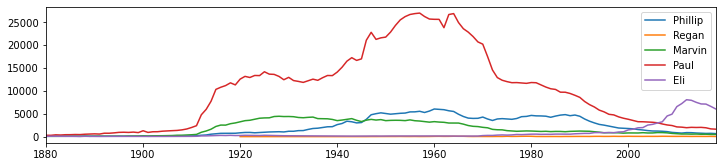

In [14]:
comparenames('M', ['Phillip', 'Regan', 'Marvin', 'Paul', 'Eli'])

This is a comparison of the popularity of the names of my close friends and I. To all our detriment it seems Paul has the most popular at all times except for around 2005 onwards where Eli has eclipsed Paul's name in popularity.

We can also see that all our names were not popular at all or even existent until 1910.

The least popular name is Regan followed closely by Eli until around 2005.

In [17]:
# Defining a list of "claires"

claires = ['Claire','Clare','Clara','Chiara','Ciara']

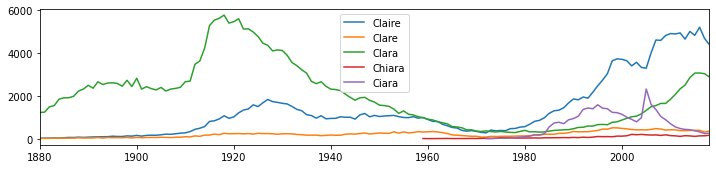

In [18]:
# Comparing their popularity as a function of time

comparenames('F', claires)

In [19]:
# Demonstrating a way to view all the claire's from the multi-index

allyears_indexed.loc[('F', 'Chiara'):('F', 'Clare')]

number
sex name   year        
F   Chiara 1959       9
           1960       5
           1962       8
           1963       9
           1964      13
...                 ...
    Clare  2014     386
           2015     389
           2016     394
           2017     315
           2018     357

[10035 rows x 1 columns]

In [20]:
# "Pivot" the third level of the multiindex (years) to create a row of columns;
# Result is names (rows) x years (columns)

allyears_indexed.loc[('F',claires),:].unstack(level=2)

number                                                          \
year          1880    1881    1882    1883    1884    1885    1886    1887   
sex name                                                                     
F   Chiara     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
    Ciara      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
    Claire    21.0    23.0    30.0    38.0    33.0    49.0    61.0    58.0   
    Clara   1226.0  1242.0  1490.0  1548.0  1852.0  1910.0  1916.0  1984.0   
    Clare     15.0    20.0    21.0    22.0    38.0    27.0    26.0    31.0   

                            ...                                          \
year          1888    1889  ...    2009    2010    2011    2012    2013   
sex name                    ...                                           
F   Chiara     NaN     NaN  ...   183.0   145.0   134.0   111.0   142.0   
    Ciara      NaN     NaN  ...   888.0   699.0   554.0   475.0   436.0   
    Claire    73.0    62.0  ...  4824.0  4915.0  4897.0  4944.0  4656.0   
    Clara   2230.0  2319.0  ...  1648.0  1842.0  2074.0  2333.0  2505.0   
    Clare     43.0    34.0  ...   405.0   421.0   414.0   379.0   377.0   

                                                    
year          2014    2015    2016    2017    2018  
sex name                                            
F   Chiara   131.0   111.0   134.0   137.0   161.0  
    Ciara    423.0   372.0   321.0   243.0   257.0  
    Claire  5014.0  4832.0  5211.0  4694.0  4399.0  
    Clara   2856.0  3066.0  3073.0  3039.0  2889.0  
    Clare    386.0   389.0   394.0   315.0   357.0  

[5 rows x 139 columns]

In [21]:
# "Pivot" the third level of the multiindex (names) to create a row of columns

allyears_indexed.loc[('F',claires),:].unstack(level=1)

number                              
name     Chiara  Ciara  Claire   Clara  Clare
sex year                                     
F   1880    NaN    NaN    21.0  1226.0   15.0
    1881    NaN    NaN    23.0  1242.0   20.0
    1882    NaN    NaN    30.0  1490.0   21.0
    1883    NaN    NaN    38.0  1548.0   22.0
    1884    NaN    NaN    33.0  1852.0   38.0
...         ...    ...     ...     ...    ...
    2014  131.0  423.0  5014.0  2856.0  386.0
    2015  111.0  372.0  4832.0  3066.0  389.0
    2016  134.0  321.0  5211.0  3073.0  394.0
    2017  137.0  243.0  4694.0  3039.0  315.0
    2018  161.0  257.0  4399.0  2889.0  357.0

[139 rows x 5 columns]

(1880.0, 2018.0, 0.0, 9589.65)

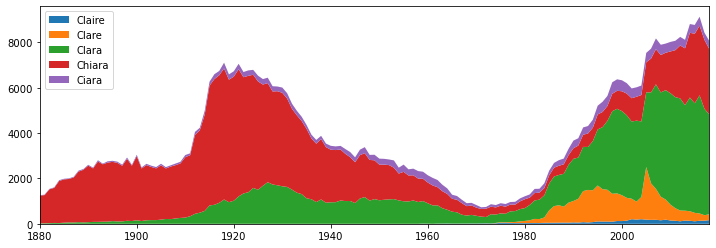

In [22]:
# Make a stacked (cumulative) area plot using names x years table 

pp.figure(figsize=(12,4))
pp.stackplot(range(1880,2019),
             allyears_indexed.loc[('F',claires),:].unstack(level=2).fillna(0), labels=claires);

pp.legend(loc='upper left')
pp.axis(xmin=1880, xmax=2018)

In [23]:
# Creating a DataFrame based on the original "allyears" with a multi-index of sex and year

allyears_byyear = allyears.set_index(['sex', 'year']).sort_index()

In [24]:
# Male name popularity for the year 1996 ordered by popularity descending

allyears_byyear.loc['M', 1996].sort_values('number', ascending=False)

name  number
sex year                     
M   1996      Michael   38364
    1996      Matthew   32073
    1996        Jacob   31927
    1996  Christopher   30903
    1996       Joshua   29172
...               ...     ...
    1996     Graciano       5
    1996       Gracen       5
    1996      Govinda       5
    1996        Gokul       5
    1996        Zyler       5

[10532 rows x 2 columns]

In [25]:
# Get the top 10 names for a given sex and year

def get_top10_sex_year(sex, year):
    return(allyears_byyear.loc[sex,year] # Select M/F, year \
            .sort_values('number', ascending=False) # Sort by most common \
            .head(10) # Show only top 10 \
            .reset_index() # Lose the index \
            ['name']) # Return a name-only series

In [26]:
# Demonstration of showing the top 10 names for each year from 2010 to 2019(exclusive)

pd.DataFrame({year: get_top10_sex_year('M', year) for year in range(2010,2019)})

,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Jacob,Jacob,Jacob,Noah,Noah,Noah,Noah,Liam,Liam
1,Ethan,Mason,Mason,Jacob,Liam,Liam,Liam,Noah,Noah
2,Michael,William,Ethan,Liam,Mason,Mason,William,William,William
3,Jayden,Jayden,Noah,Mason,Jacob,Jacob,Mason,James,James
4,William,Noah,William,William,William,William,James,Logan,Oliver
5,Alexander,Michael,Liam,Ethan,Ethan,Ethan,Benjamin,Benjamin,Benjamin
6,Noah,Ethan,Michael,Michael,Michael,James,Jacob,Mason,Elijah
7,Daniel,Alexander,Jayden,Alexander,Alexander,Alexander,Michael,Elijah,Lucas
8,Aiden,Aiden,Alexander,Jayden,James,Michael,Elijah,Jacob,Mason
9,Anthony,Daniel,Aiden,Daniel,Daniel,Benjamin,Ethan,Oliver,Logan


In [27]:
pd.DataFrame({year: get_top10_sex_year('F', year) for year in range(2010,2019)})

,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Isabella,Sophia,Sophia,Sophia,Emma,Emma,Emma,Emma,Emma
1,Sophia,Isabella,Emma,Emma,Olivia,Olivia,Olivia,Olivia,Olivia
2,Emma,Emma,Isabella,Olivia,Sophia,Sophia,Ava,Ava,Ava
3,Olivia,Olivia,Olivia,Isabella,Isabella,Ava,Sophia,Isabella,Isabella
4,Ava,Ava,Ava,Ava,Ava,Isabella,Isabella,Sophia,Sophia
5,Emily,Emily,Emily,Mia,Mia,Mia,Mia,Mia,Charlotte
6,Abigail,Abigail,Abigail,Emily,Emily,Abigail,Charlotte,Charlotte,Mia
7,Madison,Madison,Mia,Abigail,Abigail,Emily,Abigail,Amelia,Amelia
8,Chloe,Mia,Madison,Madison,Madison,Charlotte,Emily,Evelyn,Harper
9,Mia,Chloe,Elizabeth,Elizabeth,Charlotte,Harper,Harper,Abigail,Evelyn


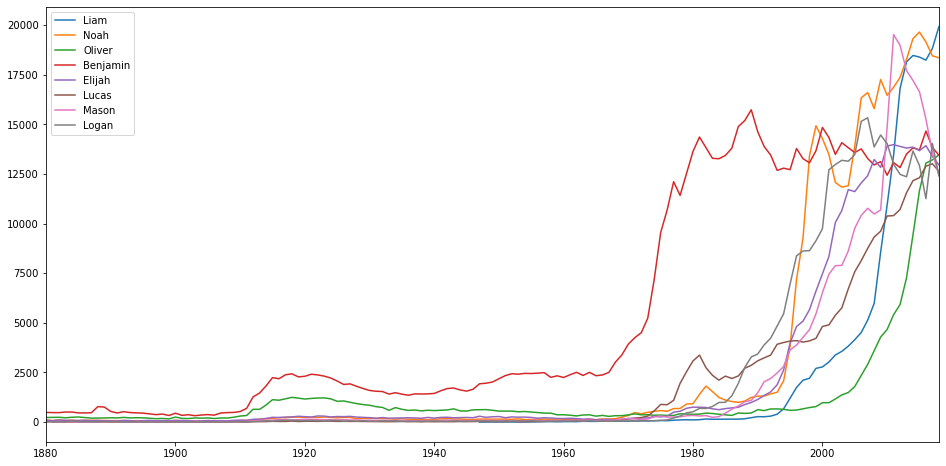

In [35]:
# Plotting the top 10 baby boy names of 2019 as a function of time from 1880 to 2019 excluding William and James due to their
# immense popularity at all points in time.

pp.figure(figsize=(16,8))

for name in ['Liam','Noah','Oliver','Benjamin','Elijah','Lucas','Mason','Logan']:
    plotname('M', name)

pp.legend()

In [29]:
# Get all time top 10 most popular female names

alltime_f = allyears_byyear.loc['F'].groupby('name').sum().sort_values('number', ascending=False).head(10)

alltime_f

,number
name,
Mary,4125843
Elizabeth,1638541
Patricia,1572050
Jennifer,1467237
Linda,1452710
Barbara,1434458
Margaret,1249035
Susan,1121746
Dorothy,1107661


Mary blowing every baby girl name out of the park with a whopping **4125843** number of baby girls named Mary!

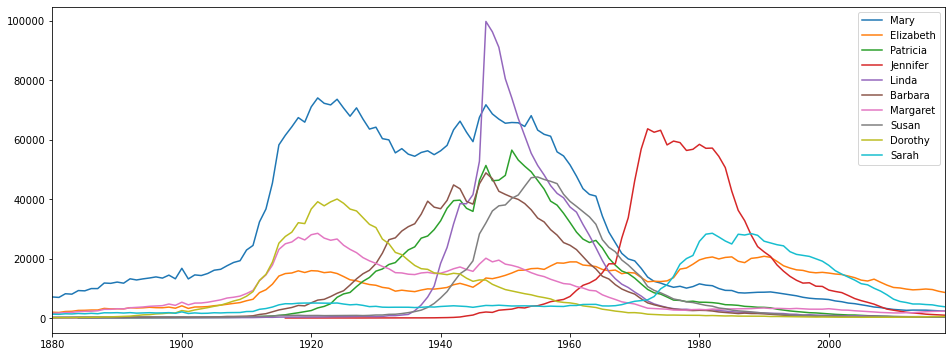

In [30]:
pp.figure(figsize=(16,6))

for name in alltime_f.index:
    plotname('F', name)
    
pp.legend()

However, it's not as obvious here that Mary fared so much better than all the other times. We can say that, the popularity of the name Mary as a proportion of all names has been consistently high resulting in such a resounding number 1 spot on the all-time popularity list for baby girl names.

In [36]:
# Get all time top 10 most popular male names

alltime_m = allyears_byyear.loc['M'].groupby('name').sum().sort_values('number', ascending=False).head(10)

alltime_m

,number
name,
James,5164629
John,5125130
Robert,4820346
Michael,4363078
William,4117640
David,3621653
Joseph,2613596
Richard,2565437
Charles,2392952


I would say it is to not many peoples surprise that these names are at the top, even till this day we are surrounded by boy's and men named here. I, myself had 3 James's in my highschool class and it gave all our teachers a huge headache.

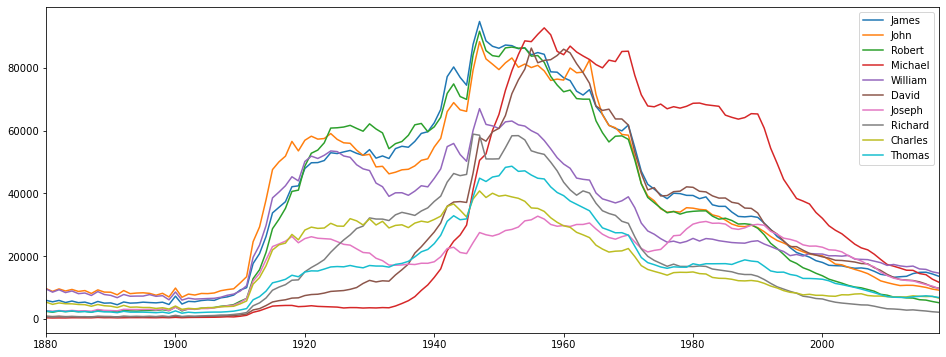

In [37]:
pp.figure(figsize=(16,6))

for name in alltime_m.index:
    plotname('M', name)
    
pp.legend()

Close contention between all these names!

In [33]:
# How popular is the name Phillip in all time ratings?

allyears_alltime = allyears_byyear.loc['M'].groupby('name').sum().sort_values('number', ascending=False).reset_index()

allyears_alltime[allyears_alltime['name'] == 'Phillip']

,name,number
103,Phillip,307992


<AxesSubplot:xlabel='name', ylabel='number'>

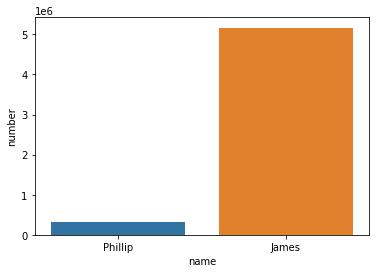

In [34]:
# All time popularity of the name Phillip in comparison to the most popular name of all time, James

alltime_m2 = allyears_byyear.loc['M'].groupby('name').sum().sort_values('number', ascending=False)

alltime_m2.loc[['Phillip', 'James']].reset_index()

sns.barplot(x='name', y='number', data=alltime_m2.loc[['Phillip', 'James']].reset_index())

Quite unfortunate really. But I would say it makes me more memorable since there aren't that many people named Phillip!

## NZ Data

In [6]:
NZbabydata = pd.read_csv('baby-names-2021-01-07.csv', encoding='cp1252')

UnicodeDecodeError: 'charmap' codec can't decode byte 0x8f in position 169527: character maps to <undefined>